In [1]:
import re


def extract_answer_from_completion(text):
    if len(text) == 1:
        return text # 1 character
    else:
        # match \b[a-z]\b
        matches = re.findall(r'\b[a-z]\b', text)
        if len(matches) != 1:
            print(text)
            return text
        return re.findall(r'\b[a-z]\b', text)[0]

In [2]:
import os
import json
import pandas as pd

def build_df(src_dir='completions'):
    result = []

    for filename in os.listdir(src_dir):
        if not filename.endswith('.jsonl'):
            continue
        with open(f'{src_dir}/{filename}') as f:
            for line in f:
                data = json.loads(line)
                content = data['response']['body']['choices'][0]['message']['content']
                uuid = data['custom_id']
                # tabulate-11-0-j-tsv-gpt-3.5-turbo
                # tabulate-<>-<idx-of-header>-<correct answer>-<format>-<model>
                _, _, hdr_idx, correct, fmt, model = uuid.split('-', 5)
                result.append((extract_answer_from_completion(content), correct, hdr_idx, fmt, model))
    df = pd.DataFrame(result, columns=['answer', 'solution', 'header_index', 'format', 'model'])
    df['correct'] = df['answer'] == df['solution']
    return df

In [4]:
df = build_df('../completions/tables')

TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET
TARGET


In [6]:
df

,answer,solution,header_index,format,model,correct
0,m,j,0,csv,gpt-3.5-turbo,False
1,h,j,0,csv_plus,gpt-3.5-turbo,False
2,m,j,0,tsv,gpt-3.5-turbo,False
3,j,j,0,html,gpt-3.5-turbo,True
4,b,j,0,markdown,gpt-3.5-turbo,False
...,...,...,...,...,...,...
5595,f,f,19,tsv,gpt-4-turbo,True
5596,f,f,19,html,gpt-4-turbo,True
5597,f,f,19,markdown,gpt-4-turbo,True
5598,f,f,19,latex,gpt-4-turbo,True


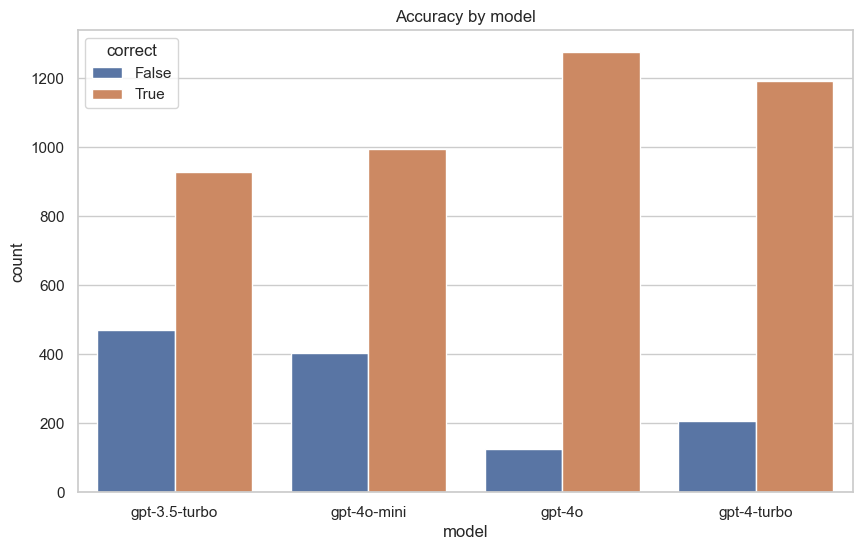

In [16]:
# plot accuracy by model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='model', hue='correct')
plt.title('Accuracy by model')
plt.show()


In [20]:
# get accuracy rates
accuracy = df[['correct', 'model']].groupby('model').mean()
accuracy

,correct
model,
gpt-3.5-turbo,0.663571
gpt-4-turbo,0.852143
gpt-4o,0.911429
gpt-4o-mini,0.711429


In [15]:
# reorder df so that categories (format) are plotted in this order:
# csv, csv_plus, tsv, html, markdown, latex, json_record

# Define the desired order for the 'format' column
desired_order = ['csv', 'tsv', 'csv_plus', 'html', 'latex', 'markdown', 'json_record']

# Convert the 'format' column to a categorical type with the desired order
df['format'] = pd.Categorical(df['format'], categories=desired_order, ordered=True)


<Figure size 1000x600 with 0 Axes>

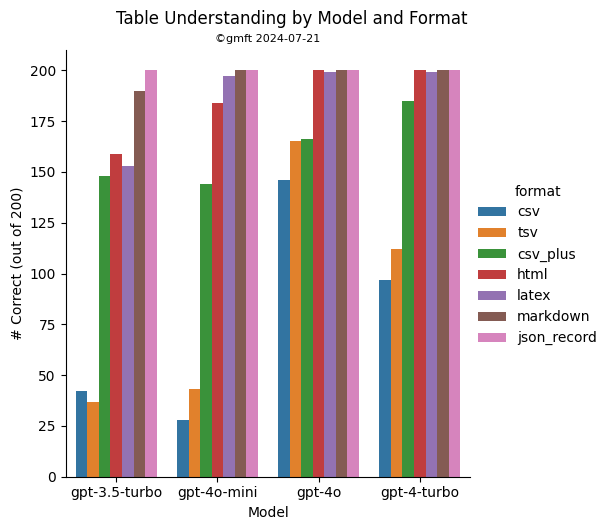

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2d accuracy w.r.t model and format
# only plot correct=True
plt.figure(figsize=(10, 6))


g = sns.catplot(data=df[df['correct']], x='model', hue='format', kind='count')

g.set_axis_labels('Model', '# Correct (out of 200)')
plt.suptitle('Table Understanding by Model and Format', y=1.05)
plt.title('©gmft 2024-07-21', fontsize=8)

plt.show()

C:\Users\conjunct\AppData\Local\Temp\ipykernel_14920\3328896299.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(data=df, x='header_index', y='correct', hue='model', ci=None)


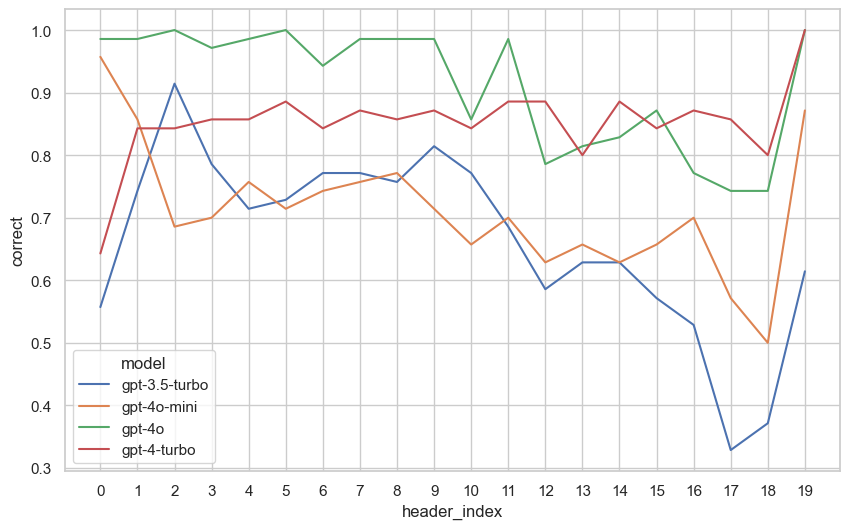

In [30]:
# plot % correct as a line graph, x is header_idx, y is % correct, broken down by model, no CI
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=df, x='header_index', y='correct', hue='model', errorbar=None)
# g.set_axis_labels('Header Index', 'Accuracy')

Text(0.5, 1.0, '©gmft 2024-07-21')

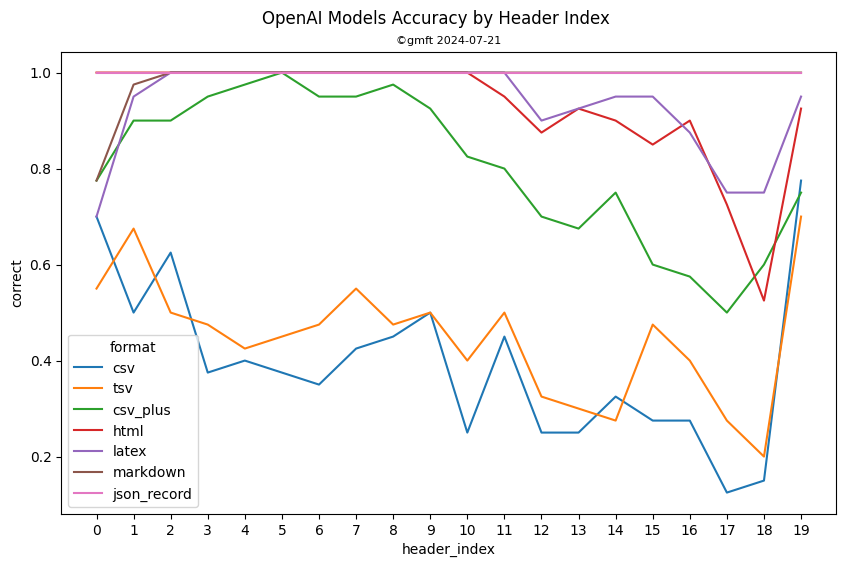

In [44]:
# plot % correct as a line graph, x is header_idx, y is % correct, broken down by model, no CI
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=df, x='header_index', y='correct', hue='format', errorbar=None)
plt.suptitle('OpenAI Models Accuracy by Header Index', y=0.95)
plt.title('©gmft 2024-07-21', fontsize=8)
# g.set_axis_labels('Header Index', 'Accuracy')

Text(0.5, 1.0, '©gmft 2024-07-21')

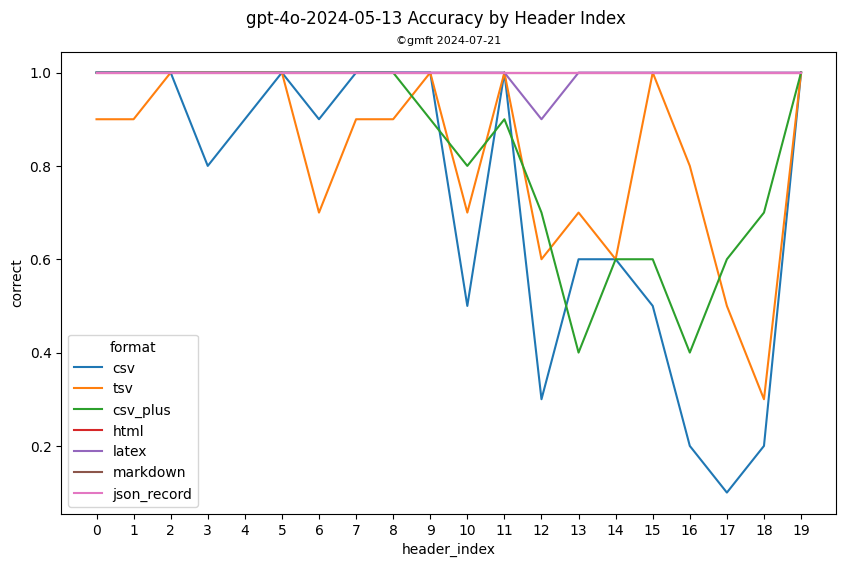

In [42]:
# specifically filter for gpt-4o, the best performance
gpt4o = df[df['model'] == 'gpt-4o']
plt.figure(figsize=(10, 6))
g = sns.lineplot(data=gpt4o, x='header_index', y='correct', hue='format', errorbar=None)
# g.set_title("GPT-4o Accuracy by Header Index and Format")
plt.suptitle('gpt-4o-2024-05-13 Accuracy by Header Index', y=0.95)
plt.title('©gmft 2024-07-21', fontsize=8)


# ed 2

In [36]:
df2 = build_df('completions/v2')

TARGET
b k
TARGET
TARGET
TARGET


<Figure size 1000x600 with 0 Axes>

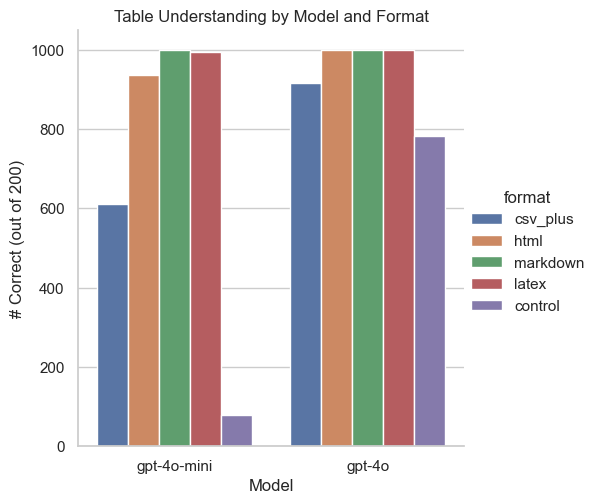

In [37]:
# plot 2d accuracy w.r.t model and format
# only plot correct=True
plt.figure(figsize=(10, 6))
g = sns.catplot(data=df2[df2['correct']], x='model', hue='format', kind='count')
g.set_axis_labels('Model', '# Correct (out of 500)')
plt.title('Table Understanding by Model and Format')
plt.show()

I realize that markdown could have an unfair advantage, since the "TARGET" header will result in a longer width entry, when pretty printing, tagging the correct answer.

Thus, v3 is conducted among the forerunners but with "!" instead as the target.

# v3

In [38]:
df3 = build_df('completions/v3')

<Figure size 1000x600 with 0 Axes>

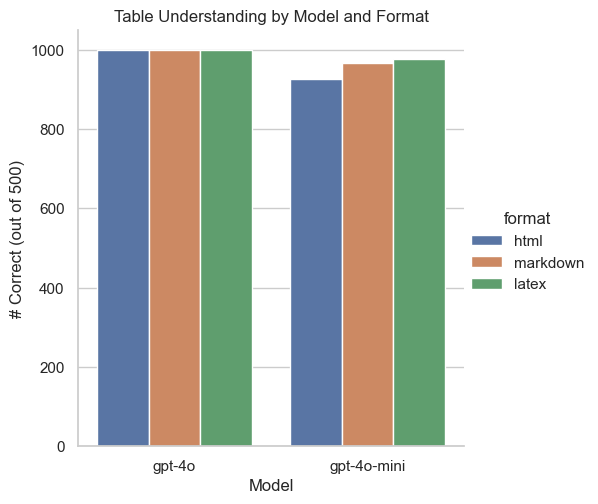

In [40]:
# plot 2d accuracy w.r.t model and format
# only plot correct=True
plt.figure(figsize=(10, 6))
g = sns.catplot(data=df3[df3['correct']], x='model', hue='format', kind='count')
g.set_axis_labels('Model', '# Correct (out of 500)')
plt.title('Table Understanding by Model and Format')
plt.show()